# Match Kitti Sequence version 19-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
from urb_sequence import *
%matplotlib inline 

Read the first 10 frames from KITTI sequence 00.

In [2]:
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_2'
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/00/image_3'

frame = []
for frameid in range(0,10):
    filename = '%06d.png'%(frameid)
    left_frame = Frame(LEFTDIR + '/' + filename)
    left_frame.get_framepoints()
    frame.append(left_frame)
    left_frame.read_corresponding(RIGHTDIR)

Inspect the framepoints for the first frame

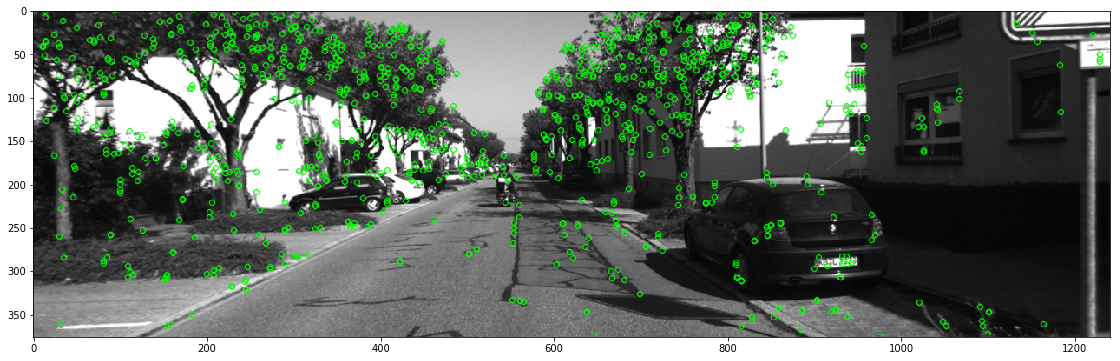

In [3]:
#frame[0].computeDepth()
#frame[0].getFramePoints()[0].id = 100
show(draw_frame_id(frame[0]))

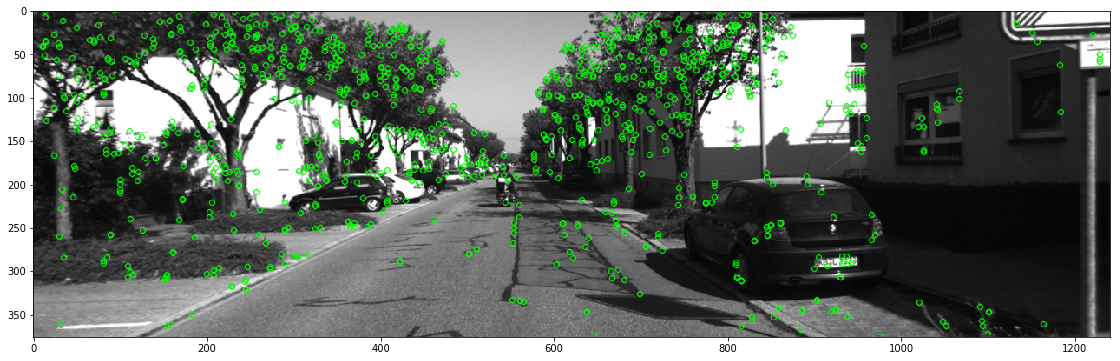

In [4]:
#frame[0].computeDepth()
#frame[0].getFramePoints()[0].id = 100
show(draw_frame_id(frame[0]))

We can also manually compute the Depth of the points and show these

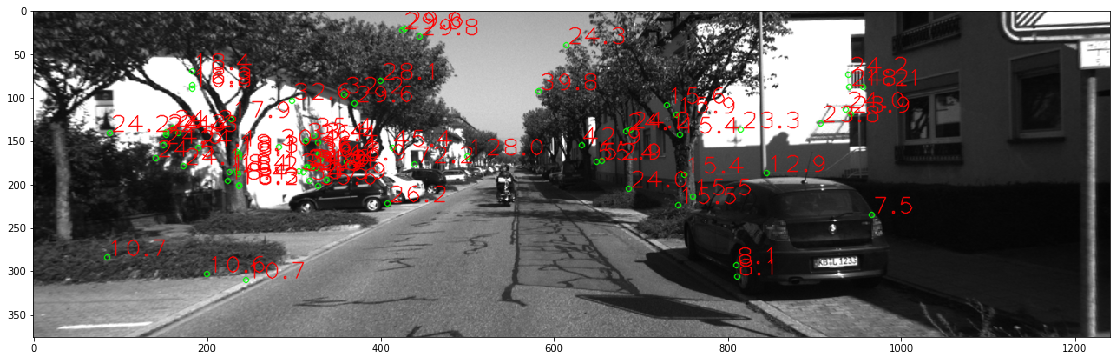

In [5]:
frame[0].compute_depth() # estimate the depth for the framePoints
frame[0].filter_non_stereo() # filters out framePoints with low confidence
show(draw_frame_depth(frame[0]))
#show(draw_framepoints_id(frame[0].get_framepoints()[-100:]))

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [6]:
seq = create_sequence(frame)

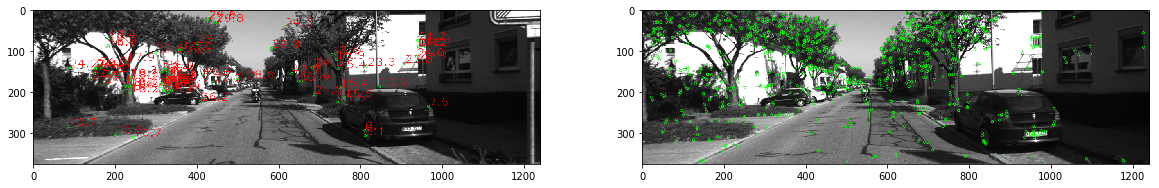

In [7]:
show2(draw_frame_depth(frame[0]), draw_frame_depth(frame[1]))

Show only the ID's in frame[0] that are actually in frame[1], to avoid clutter in the image.

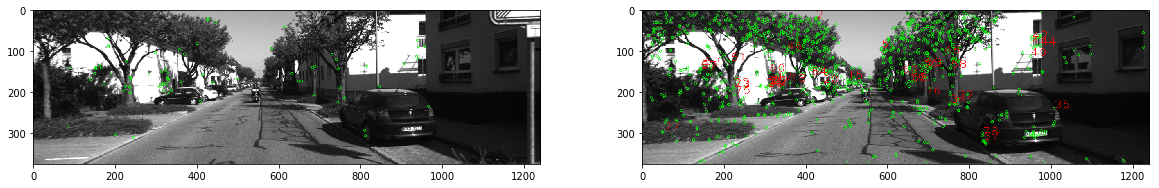

In [8]:
kp0 = [kp for kp in frame[0].get_framepoints() if kp.id in [p.id for p in frame[1].get_framepoints()]]

show2(draw_framepoints_id(kp0), draw_framepoints_id(frame[1].get_framepoints()))